<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/Integrating_XAI_to_hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ada1d58a91a5b7c9a1f15f1616dcb25887cbba3bf39f28cef4008d2e2a8c5e68
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Glioblastoma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
1/1 ━━━━━━━━━━━━━━━

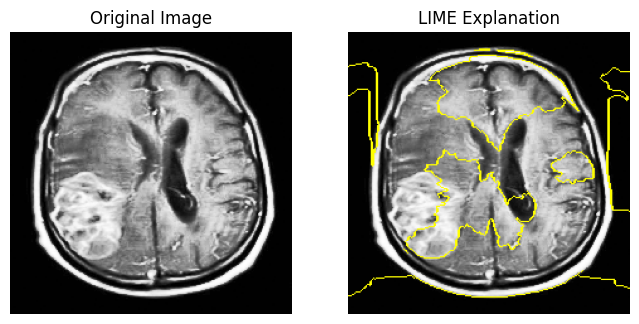

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the trained hybrid model
model_path = '/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model_Last.keras'
hybrid_model = tf.keras.models.load_model(model_path)

class_labels = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

def preprocess_image(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = np.stack([image] * 3, axis=-1)
    image = image.astype(np.float32) / 255.0
    return image

test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png"
test_image = preprocess_image(test_image_path)

test_image_exp = np.expand_dims(test_image, axis=0)

# Prediction
predictions = hybrid_model.predict(test_image_exp)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted Class: {class_labels[predicted_class]}")

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return hybrid_model.predict(images)

# Apply LIME to explain model decision
explanation = explainer.explain_instance(
    test_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(test_image, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()


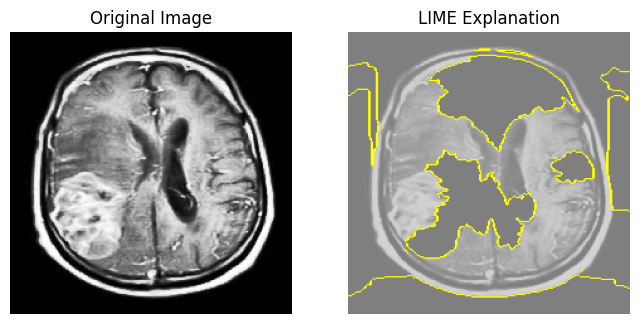

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

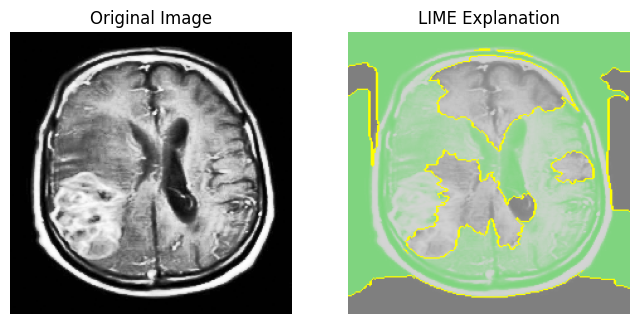

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

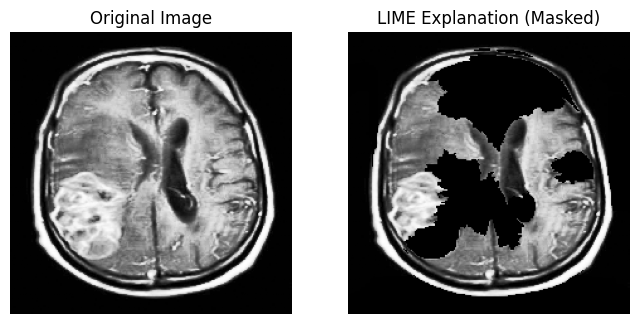

In [ ]:
# Get explanation mask
label = explanation.top_labels[0]
_, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

# Apply mask to the original grayscale image
masked_image = test_image[:, :, 0] * mask  # Zero out areas outside the boundary

# Display results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[:, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')
plt.title("LIME Explanation (Masked)")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: meningioma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 

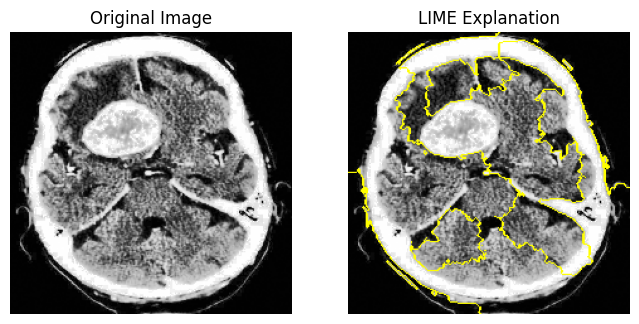

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the trained hybrid model
model_path = '/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model_Last.keras'
hybrid_model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

# Define image preprocessing function
def preprocess_image(img_path):
    """Load and preprocess an image for model prediction."""
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = np.stack([image] * 3, axis=-1)
    image = image.astype(np.float32) / 255.0
    return image

# Load a test image
test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/meningioma/image_30020.png"
test_image = preprocess_image(test_image_path)

# Expand dimensions to match model input shape
test_image_exp = np.expand_dims(test_image, axis=0)  # Shape (1, 224, 224, 3)

# Make a prediction
predictions = hybrid_model.predict(test_image_exp)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted Class: {class_labels[predicted_class]}")

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)  # Convert list to NumPy array
    return hybrid_model.predict(images)  # Get model predictions

# Apply LIME to explain model decision
explanation = explainer.explain_instance(
    test_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(test_image, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()


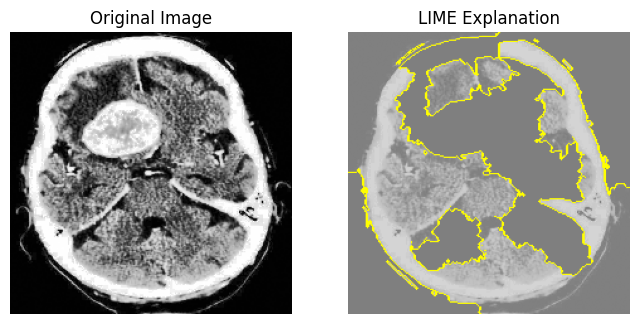

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

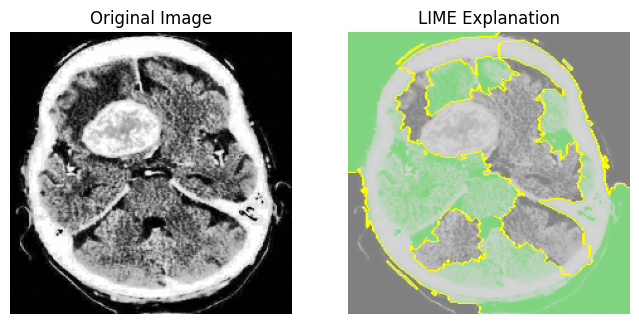

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

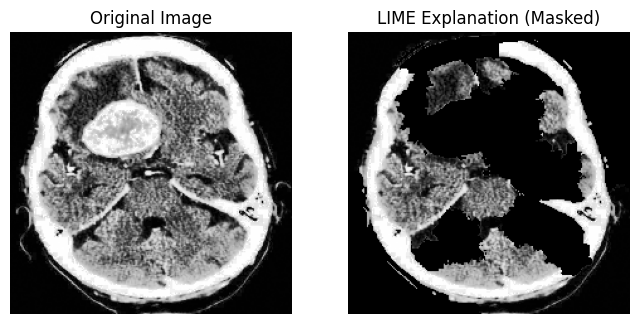

In [ ]:
# Get explanation mask
label = explanation.top_labels[0]
_, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

# Apply mask to the original grayscale image
masked_image = test_image[:, :, 0] * mask  # Zero out areas outside the boundary

# Display results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[:, :, 0], cmap='gray')  # Original grayscale image
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')  # Show only areas inside the boundary
plt.title("LIME Explanation (Masked)")
plt.axis("off")

plt.show()

2. Integrating Grad-CAM

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [ ]:
layer_names=[layer.name for layer in hybrid_model.layers]
layer_names

['input_layer',
 'conv2d_4',
 'reshape',
 'layer_normalization_1',
 'multi_head_attention',
 'dropout_1',
 'add_1',
 'layer_normalization_2',
 'dense',
 'dense_1',
 'dropout_2',
 'add_2',
 'layer_normalization_3',
 'multi_head_attention_1',
 'dropout_4',
 'add_3',
 'layer_normalization_4',
 'dense_2',
 'dense_3',
 'dropout_5',
 'add_4',
 'layer_normalization_5',
 'multi_head_attention_2',
 'dropout_7',
 'add_5',
 'layer_normalization_6',
 'dense_4',
 'dense_5',
 'dropout_8',
 'add_6',
 'layer_normalization_7',
 'conv2d',
 'multi_head_attention_3',
 'max_pooling2d',
 'dropout_10',
 'conv2d_1',
 'add_7',
 'max_pooling2d_1',
 'layer_normalization_8',
 'conv2d_2',
 'dense_6',
 'max_pooling2d_2',
 'dense_7',
 'conv2d_3',
 'dropout_11',
 'max_pooling2d_3',
 'add_8',
 'global_average_pooling2d',
 'global_average_pooling1d',
 'layer_normalization',
 'layer_normalization_9',
 'concatenate',
 'dense_8',
 'layer_normalization_10',
 'dropout_12',
 'dense_9']

In [ ]:
!pip install tf-explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00


✅ Model loaded successfully.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 7, 7, 64)       │        196,672 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 49, 64)         │              0 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 49, 64)         │              0 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_23    │ (None, 49, 64)         │            128 │ add_18[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_8    │ (None, 49, 64)         │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 49, 64)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_19 (Add)              │ (None, 49, 64)         │              0 │ add_18[0][0],          │
│                           │                        │                │ dropout_27[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_24    │ (None, 49, 64)         │            128 │ add_19[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 49, 256)        │         16,640 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 49, 64)         │         16,448 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 49, 64)         │              0 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 49, 64)         │              0 │ add_19[0][0],          │
│                           │                        │                │ dropout_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_25    │ (None, 49, 64)         │            128 │ add_20[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 49, 64)         │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout) 

 Total params: 3,214,130 (12.26 MB)

 Trainable params: 1,071,376 (4.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,142,754 (8.17 MB)


✅ Using last CNN layer for Grad-CAM: conv2d_13
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


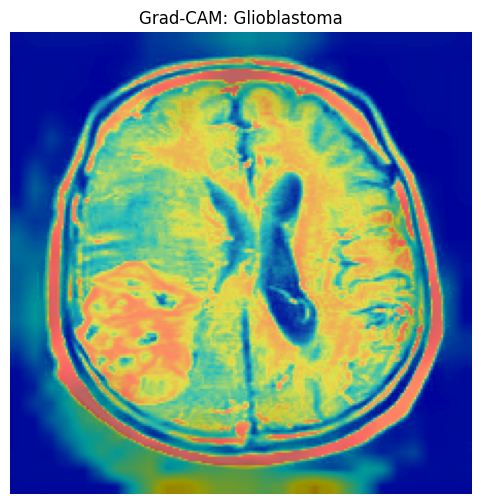

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
import os
from tf_explain.core.grad_cam import GradCAM  # Import Grad-CAM

# Custom Lambda function that preserves input shape
def identity(x):
    return x

def identity_output_shape(input_shape):
    return input_shape

# Define custom objects dictionary
custom_objects = {
    "identity": identity,
    "identity_output_shape": identity_output_shape
}

model_path = "/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model_Last.keras"
assert os.path.exists(model_path), f"❌ Model file not found at {model_path}"

try:
    hybrid_model = load_model(model_path, custom_objects=custom_objects)
    print("✅ Model loaded successfully.")
except Exception as e:
    print("❌ Error loading model:", e)
    raise

hybrid_model.summary()

# Identify last Conv2D layer
conv_layers = [layer.name for layer in hybrid_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
last_conv_layer = conv_layers[-1] if conv_layers else None

if last_conv_layer is None:
    raise ValueError("❌ No Conv2D layers found in the model.")

print(f"\n✅ Last CNN layer for Grad-CAM: {last_conv_layer}")

class_names = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

img_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png"
assert os.path.exists(img_path), f"Image file not found at {img_path}"

original_image = cv2.imread(img_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(original_image, (224, 224))
img_array = np.expand_dims(img_resized / 255.0, axis=0)


def visualize_gradcam(model, image, original_image, class_names, layer_name):

    explainer = GradCAM()  # Initialize Grad-CAM

    predicted_class = np.argmax(model.predict(image))

    # Pass the predicted class as class_index
    heatmap = explainer.explain(validation_data=(image, None),
                                model=model,
                                layer_name=layer_name,
                                class_index=predicted_class)  # Add class_index

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap onto original image
    alpha = 0.4
    superimposed_img = cv2.addWeighted(original_image, alpha, heatmap, 1 - alpha, 0)

    # Displaying results
    plt.figure(figsize=(6, 6))
    plt.imshow(superimposed_img)

    plt.title(f"Grad-CAM: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

visualize_gradcam(hybrid_model, img_array, original_image, class_names, last_conv_layer)


✅ Model loaded successfully.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 7, 7, 64)       │        196,672 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 49, 64)         │              0 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 49, 64)         │              0 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_23    │ (None, 49, 64)         │            128 │ add_18[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_8    │ (None, 49, 64)         │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 49, 64)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_19 (Add)              │ (None, 49, 64)         │              0 │ add_18[0][0],          │
│                           │                        │                │ dropout_27[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_24    │ (None, 49, 64)         │            128 │ add_19[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 49, 256)        │         16,640 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 49, 64)         │         16,448 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 49, 64)         │              0 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 49, 64)         │              0 │ add_19[0][0],          │
│                           │                        │                │ dropout_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_25    │ (None, 49, 64)         │            128 │ add_20[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 49, 64)         │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout) 

 Total params: 3,214,130 (12.26 MB)

 Trainable params: 1,071,376 (4.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,142,754 (8.17 MB)


✅ Model expected input shape: (None, 224, 224, 3)

✅ Detected CNN layers: ['conv2d_14', 'conv2d_10', 'conv2d_11', 'conv2d_12', 'conv2d_13']

✅ Using last CNN layer for Grad-CAM: conv2d_13


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step

✅ Model Prediction: No Tumour (14)


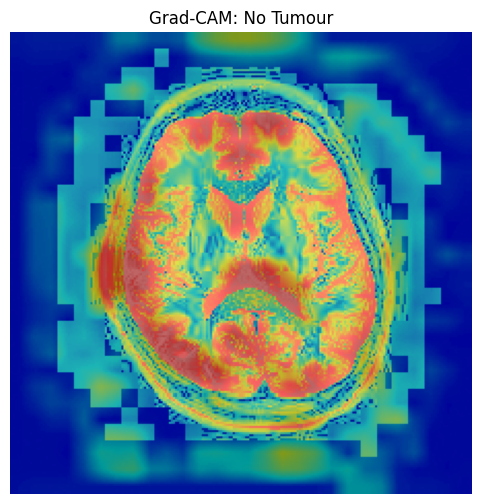

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
import os
from tf_explain.core.grad_cam import GradCAM  # Import Grad-CAM

# Custom Lambda function that preserves input shape
def identity(x):
    return x

def identity_output_shape(input_shape):
    return input_shape

# Define custom objects dictionary
custom_objects = {
    "identity": identity,
    "identity_output_shape": identity_output_shape
}

model_path = "/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model_Last.keras"
assert os.path.exists(model_path), f"❌ Model file not found at {model_path}"

try:
    hybrid_model = load_model(model_path, custom_objects=custom_objects)
    print("✅ Model loaded successfully.")
except Exception as e:
    print("❌ Error loading model:", e)
    raise

hybrid_model.summary()

# Identify last Conv2D layer
conv_layers = [layer.name for layer in hybrid_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
last_conv_layer = conv_layers[-1] if conv_layers else None

if last_conv_layer is None:
    raise ValueError("❌ No Conv2D layers found in the model.")

print(f"\n✅ Last CNN layer for Grad-CAM: {last_conv_layer}")

class_names = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

img_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/no tumour/image_10.png"
assert os.path.exists(img_path), f"Image file not found at {img_path}"

original_image = cv2.imread(img_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(original_image, (224, 224))
img_array = np.expand_dims(img_resized / 255.0, axis=0)


def visualize_gradcam(model, image, original_image, class_names, layer_name):
    """Generates and displays Grad-CAM heatmap for a given image."""
    explainer = GradCAM()  # Initialize Grad-CAM

    predicted_class = np.argmax(model.predict(image))

    # Pass the predicted class as class_index
    heatmap = explainer.explain(validation_data=(image, None),
                                model=model,
                                layer_name=layer_name,
                                class_index=predicted_class)  # Add class_index

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap onto original image
    alpha = 0.4
    superimposed_img = cv2.addWeighted(original_image, alpha, heatmap, 1 - alpha, 0)

    # Displaying results
    plt.figure(figsize=(6, 6))
    plt.imshow(superimposed_img)

    plt.title(f"Grad-CAM: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

visualize_gradcam(hybrid_model, img_array, original_image, class_names, last_conv_layer)


In [ ]:
layer_names=[layer.name for layer in hybrid_model.layers]
layer_names

['input_layer_2',
 'conv2d_14',
 'reshape_2',
 'layer_normalization_23',
 'multi_head_attention_8',
 'dropout_27',
 'add_19',
 'layer_normalization_24',
 'dense_20',
 'dense_21',
 'dropout_28',
 'add_20',
 'layer_normalization_25',
 'multi_head_attention_9',
 'dropout_30',
 'add_21',
 'layer_normalization_26',
 'dense_22',
 'dense_23',
 'dropout_31',
 'add_22',
 'layer_normalization_27',
 'multi_head_attention_10',
 'dropout_33',
 'add_23',
 'layer_normalization_28',
 'dense_24',
 'dense_25',
 'dropout_34',
 'add_24',
 'layer_normalization_29',
 'conv2d_10',
 'multi_head_attention_11',
 'max_pooling2d_8',
 'dropout_36',
 'conv2d_11',
 'add_25',
 'max_pooling2d_9',
 'layer_normalization_30',
 'conv2d_12',
 'dense_26',
 'max_pooling2d_10',
 'dense_27',
 'conv2d_13',
 'dropout_37',
 'max_pooling2d_11',
 'add_26',
 'global_average_pooling2d_2',
 'global_average_pooling1d_2',
 'layer_normalization_22',
 'layer_normalization_31',
 'concatenate_2',
 'dense_28',
 'layer_normalization_32',
 'dr